In [41]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
#city_data_to_load = "data/city_data.csv"
#ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydatatoload_df = pd.read_csv("data/city_data.csv")
ridedatatoload_df= pd.read_csv("data/ride_data.csv")

citydatatoload_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [42]:
city_type= citydatatoload_df.drop_duplicates('city')

ridedatatoload_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [43]:

merge_df = ridedatatoload_df.merge(citydatatoload_df, on="city")
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [44]:
grouped_city = merge_df.groupby(['city'])

merge_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [45]:
avg_fare = grouped_city['fare'].mean()
rides_by_city = grouped_city['ride_id'].count()
drivers_by_city = grouped_city['driver_count'].mean()
city_type2 = city_type.set_index('city')['type']
city_data2 = pd.DataFrame({
    "Number of Rides": rides_by_city,
    "Average Fare": avg_fare,
    "Number of Drivers": drivers_by_city,
    "Type of City": city_type2})

city_data2.head()

,Number of Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


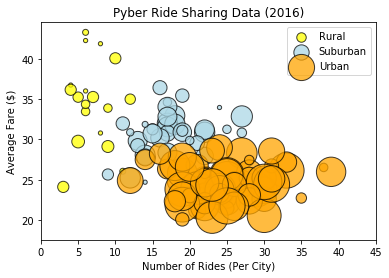

In [46]:

rural = city_data2.loc[city_data2['Type of City']=='Rural']
urban = city_data2.loc[city_data2['Type of City']=='Urban']
suburban = city_data2.loc[city_data2['Type of City']=='Suburban']
plt.scatter(rural['Number of Rides'],rural['Average Fare'],s=rural['Number of Drivers']*18, color = 'yellow',edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'],suburban['Average Fare'],s=suburban['Number of Drivers']*18, color = 'lightblue',edgecolor = 'black', label = "Suburban", alpha = .75)
plt.scatter(urban['Number of Rides'],urban['Average Fare'],s=urban['Number of Drivers']*18, color = 'orange',edgecolor = 'black', label = "Urban", alpha = .75)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0,45)
plt.legend(loc="best")
plt.show()


## Total Fares by City Type

In [47]:
total_fares_amount = merge_df.fare.sum()
total_rides_amount = merge_df.ride_id.count()
total_drivers_amount = drivers_by_city.sum()

print(total_fares_amount, total_rides_amount, total_drivers_amount)

63538.64 2375 2973


In [48]:
fare_urban = merge_df.fare[merge_df.type == 'Urban'].sum() 
fare_urban = round(fare_urban/total_fares_amount,2)

fare_suburban = merge_df.fare[merge_df.type == 'Suburban'].sum() 
fare_suburban = round(fare_suburban/total_fares_amount,2)

fare_rural = merge_df.fare[merge_df.type == 'Rural'].sum() 
fare_rural = round(fare_rural/total_fares_amount,2)

check = fare_rural+fare_suburban+fare_urban

print(fare_urban, fare_suburban, fare_rural,check)

0.63 0.3 0.07 1.0


In [49]:

ride_urban = merge_df.ride_id[merge_df.type == 'Urban'].count() 
ride_urban = round(ride_urban/total_rides_amount,2)

ride_suburban = merge_df.ride_id[merge_df.type == 'Suburban'].count() 
ride_suburban = round(ride_suburban/total_rides_amount,2)

ride_rural = merge_df.ride_id[merge_df.type == 'Rural'].count() 
ride_rural = round(ride_rural/total_rides_amount,2)

check = ride_rural+ride_suburban+ride_urban

print(ride_urban, ride_suburban, ride_rural,check)

0.68 0.26 0.05 0.99


In [50]:

driver_urban = city_data2['Number of Drivers'][city_data2['Type of City'] == 'Urban'].sum() 
driver_urban = round(driver_urban/total_drivers_amount,2)

driver_suburban = city_data2['Number of Drivers'][city_data2['Type of City'] == 'Suburban'].sum() 
driver_suburban = round(driver_suburban/total_drivers_amount,2)

driver_rural = city_data2['Number of Drivers'][city_data2['Type of City'] == 'Rural'].sum() 
driver_rural = round(driver_rural/total_drivers_amount,2)

check = driver_rural+driver_suburban+driver_urban

print(driver_urban, driver_suburban, driver_rural,check)

0.81 0.16 0.03 1.0


(-1.143163076388845,
 1.0946859206084065,
 -1.214495832873688,
 1.1144321745814545)

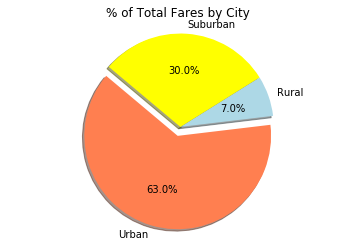

In [51]:
labels = ['Urban', 'Rural', 'Suburban']

sizes = [fare_urban, fare_rural, fare_suburban]

explode = (0.1, 0, 0)

colors = ["coral", "lightblue", "yellow"]


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Fares by City')
plt.axis('equal')

In [52]:
# Show Figure
plt.show()

## Total Rides by City Type

(-1.130485183549818,
 1.1011915377523607,
 -1.219768364737134,
 1.1066768256609576)

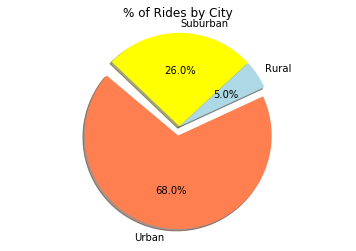

In [54]:
labels = ['Urban', 'Rural', 'Suburban']

sizes = [ride_urban, ride_rural, ride_suburban]

explode = (0.1, 0, 0)

colors = ["coral", "lightblue", "yellow"]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Rides by City')
plt.axis('equal')

In [39]:
# Show Figure
plt.show()

## Total Drivers by City Type

(-1.0777728478196342,
 1.1297218717429154,
 -1.2054876050564465,
 1.1191569506925727)

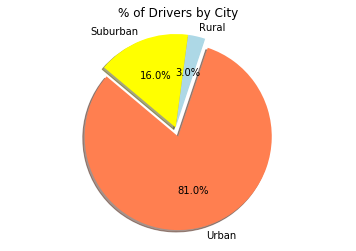

In [55]:
labels = ['Urban', 'Rural', 'Suburban']

sizes = [driver_urban, driver_rural, driver_suburban]

explode = (0.1, 0, 0)

colors = ["coral", "lightblue", "yellow"]


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Drivers by City')
plt.axis('equal')


In [56]:
# Show Figure
plt.show()